## Setup

In [1]:
from eocanvas import API, Credentials
from eocanvas.api import Input, Config, ConfigOption
from eocanvas.processes import SnapProcess
from eocanvas.snap.graph import Graph

In [2]:
c = Credentials.load()

In [3]:
from hda import Client

In [4]:
c = Client()

## Data

In [5]:
c.metadata("EO:ESA:DAT:SENTINEL-2")

{'type': 'object',
 'title': 'Querable',
 'properties': {'dataset_id': {'title': 'dataset_id',
   'type': 'string',
   'oneOf': [{'const': 'EO:ESA:DAT:SENTINEL-2',
     'title': 'EO:ESA:DAT:SENTINEL-2',
     'group': None}]},
  'bbox': {'title': 'Bbox',
   'type': 'array',
   'minItems': 4,
   'maxItems': 4,
   'items': [{'type': 'number', 'maximum': 180, 'minimum': -180},
    {'type': 'number', 'maximum': 90, 'minimum': -90},
    {'type': 'number', 'maximum': 180, 'minimum': -180},
    {'type': 'number', 'maximum': 90, 'minimum': -90}]},
  'productIdentifier': {'title': 'Product Identifier',
   'type': 'string',
   'pattern': '^[a-zA-Z0-9]+$'},
  'productType': {'title': 'Product Type',
   'type': 'string',
   'oneOf': [{'const': 'S2MSI1C', 'title': 'S2MSI1C', 'group': None},
    {'const': 'S2MSI2A', 'title': 'S2MSI2A', 'group': None},
    {'const': 'AUX_GNSSRD', 'title': 'AUX_GNSSRD', 'group': None},
    {'const': 'AUX_PROQUA', 'title': 'AUX_PROQUA', 'group': None},
    {'const': 'AU

In [6]:
q = {
    "dataset_id": "EO:ESA:DAT:SENTINEL-2",
    "startdate": "2020-06-23T00:00:00.000Z",
    "enddate": "2020-06-24T00:00:00.000Z",
    "processingLevel": "S2MSI1C",
    "tileId": "30UUA"
}

In [7]:
r = c.search(q)

In [8]:
url = r.get_download_urls()[0]
inputs = Input(key="img1", url=url)

In [9]:
import json

In [10]:
with open('AOIs.txt', 'r') as fp:
    poly_dict = json.load(fp)

In [11]:
poly_dict

{'2': {'geoRegion': 'POLYGON ((-5.22444257 49.9901843, -4.88225479 49.9901843, -4.88225479 50.29003327, -5.22444257 50.29003327, -5.22444257 49.9901843))',
  'tile_Id': '30UUA'},
 '3': {'geoRegion': 'POLYGON ((-4.81917128 50.19269224, -4.59558622 50.19269224, -4.59558622 50.40467681, -4.81917128 50.40467681, -4.81917128 50.19269224))',
  'tile_Id': '30UUA'},
 '4': {'geoRegion': 'POLYGON ((-4.32949749 50.26538565, -4.02885352 50.26538565, -4.02885352 50.5075424, -4.32949749 50.5075424, -4.32949749 50.26538565))',
  'tile_Id': '30UVA'},
 '6': {'geoRegion': 'POLYGON ((-4.02836874 50.14143345, -3.59050258 50.14143345, -3.59050258 50.34954708, -4.02836874 50.34954708, -4.02836874 50.14143345))',
  'tile_Id': '30UVA'},
 '9': {'geoRegion': 'POLYGON ((-3.70217003 50.32171356, -3.4070158 50.32171356, -3.4070158 50.54736093, -3.70217003 50.54736093, -3.70217003 50.32171356))',
  'tile_Id': '30UVA'},
 '11': {'geoRegion': 'POLYGON ((-4.42178593 50.96017888, -3.80799343 50.96017888, -3.80799343 51.

In [12]:
polys_tile0 = {k: v for k, v in poly_dict.items() if v['tile_Id'] == '30UUA'}

In [13]:
poly0 = polys_tile0['2']

In [14]:
poly0['geoRegion']

'POLYGON ((-5.22444257 49.9901843, -4.88225479 49.9901843, -4.88225479 50.29003327, -5.22444257 50.29003327, -5.22444257 49.9901843))'

## Process workflow

In [15]:
#help(SnapProcess)

In [16]:
with open("s2_c2rcc.xml", "r") as fp:
    graph_file = fp.read()

In [17]:
graph_file

'<graph id="Graph">\n  <version>1.0</version>\n  <node id="Read">\n    <operator>Read</operator>\n    <sources/>\n    <parameters class="com.bc.ceres.binding.dom.XppDomElement">\n      <useAdvancedOptions>false</useAdvancedOptions>\n      <file>$img1</file>\n      <copyMetadata>true</copyMetadata>\n      <bandNames/>\n      <pixelRegion>0,0,10980,10980</pixelRegion>\n      <maskNames/>\n    </parameters>\n  </node>\n  <node id="Subset">\n    <operator>Subset</operator>\n    <sources>\n      <sourceProduct refid="Read"/>\n    </sources>\n    <parameters class="com.bc.ceres.binding.dom.XppDomElement">\n      <sourceBands/>\n      <tiePointGrids/>\n      <region>0,0,0,0</region>\n      <referenceBand/>\n      <geoRegion>$polygon</geoRegion>\n      <subSamplingX>1</subSamplingX>\n      <subSamplingY>1</subSamplingY>\n      <fullSwath>false</fullSwath>\n      <copyMetadata>true</copyMetadata>\n    </parameters>\n  </node>\n  <node id="Resample">\n    <operator>Resample</operator>\n    <sour

In [18]:
modified_xml = graph_file.replace("$polygon", poly0['geoRegion'])

In [19]:
modified_xml

'<graph id="Graph">\n  <version>1.0</version>\n  <node id="Read">\n    <operator>Read</operator>\n    <sources/>\n    <parameters class="com.bc.ceres.binding.dom.XppDomElement">\n      <useAdvancedOptions>false</useAdvancedOptions>\n      <file>$img1</file>\n      <copyMetadata>true</copyMetadata>\n      <bandNames/>\n      <pixelRegion>0,0,10980,10980</pixelRegion>\n      <maskNames/>\n    </parameters>\n  </node>\n  <node id="Subset">\n    <operator>Subset</operator>\n    <sources>\n      <sourceProduct refid="Read"/>\n    </sources>\n    <parameters class="com.bc.ceres.binding.dom.XppDomElement">\n      <sourceBands/>\n      <tiePointGrids/>\n      <region>0,0,0,0</region>\n      <referenceBand/>\n      <geoRegion>POLYGON ((-5.22444257 49.9901843, -4.88225479 49.9901843, -4.88225479 50.29003327, -5.22444257 50.29003327, -5.22444257 49.9901843))</geoRegion>\n      <subSamplingX>1</subSamplingX>\n      <subSamplingY>1</subSamplingY>\n      <fullSwath>false</fullSwath>\n      <copyMeta

In [20]:
graph = Graph.from_text(modified_xml)

In [21]:
help(Config)

Help on class Config in module eocanvas.api:

class Config(builtins.object)
 |  Config(key: 'str', options: 'ConfigOption') -> None
 |  
 |  Config(key: 'str', options: 'ConfigOption')
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, key: 'str', options: 'ConfigOption') -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  asdict(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {'key': 'str', 'options': 'ConfigOption'}
 |  
 |  __dataclass_fields__ = {'key': Field(name='k

In [22]:
config = Config(key="img1", options=ConfigOption(uncompress=False, sub_path=""))

In [23]:
process = SnapProcess(snap_graph=graph, eo_config=config, eo_input=inputs)

In [26]:
process.prepare_inputs()

{'inputs': {'snap_graph': 'PGdyYXBoIGlkPSJHcmFwaCI+CiAgPHZlcnNpb24+MS4wPC92ZXJzaW9uPgogIDxub2RlIGlkPSJSZWFkIj4KICAgIDxvcGVyYXRvcj5SZWFkPC9vcGVyYXRvcj4KICAgIDxzb3VyY2VzLz4KICAgIDxwYXJhbWV0ZXJzIGNsYXNzPSJjb20uYmMuY2VyZXMuYmluZGluZy5kb20uWHBwRG9tRWxlbWVudCI+CiAgICAgIDx1c2VBZHZhbmNlZE9wdGlvbnM+ZmFsc2U8L3VzZUFkdmFuY2VkT3B0aW9ucz4KICAgICAgPGZpbGU+JGltZzE8L2ZpbGU+CiAgICAgIDxjb3B5TWV0YWRhdGE+dHJ1ZTwvY29weU1ldGFkYXRhPgogICAgICA8YmFuZE5hbWVzLz4KICAgICAgPHBpeGVsUmVnaW9uPjAsMCwxMDk4MCwxMDk4MDwvcGl4ZWxSZWdpb24+CiAgICAgIDxtYXNrTmFtZXMvPgogICAgPC9wYXJhbWV0ZXJzPgogIDwvbm9kZT4KICA8bm9kZSBpZD0iU3Vic2V0Ij4KICAgIDxvcGVyYXRvcj5TdWJzZXQ8L29wZXJhdG9yPgogICAgPHNvdXJjZXM+CiAgICAgIDxzb3VyY2VQcm9kdWN0IHJlZmlkPSJSZWFkIi8+CiAgICA8L3NvdXJjZXM+CiAgICA8cGFyYW1ldGVycyBjbGFzcz0iY29tLmJjLmNlcmVzLmJpbmRpbmcuZG9tLlhwcERvbUVsZW1lbnQiPgogICAgICA8c291cmNlQmFuZHMvPgogICAgICA8dGllUG9pbnRHcmlkcy8+CiAgICAgIDxyZWdpb24+MCwwLDAsMDwvcmVnaW9uPgogICAgICA8cmVmZXJlbmNlQmFuZC8+CiAgICAgIDxnZW9SZWdpb24+UE9MWUdPTiAoKC01LjIyNDQ0MjU3IDQ5Ljk5M

In [25]:
process.run(download_dir="result")

Job: 0526de99-6e0e-5288-bf06-1b7ca1a2347b - Status: accepted at 2025-01-27T14:03:58.923989
Job: 0526de99-6e0e-5288-bf06-1b7ca1a2347b - Status: running at 2025-01-27T14:04:09.079539
Job: 0526de99-6e0e-5288-bf06-1b7ca1a2347b - Status: running at 2025-01-27T14:04:20.224317
Job: 0526de99-6e0e-5288-bf06-1b7ca1a2347b - Status: running at 2025-01-27T14:04:32.426060
Job: 0526de99-6e0e-5288-bf06-1b7ca1a2347b - Status: running at 2025-01-27T14:04:45.819617
Job: 0526de99-6e0e-5288-bf06-1b7ca1a2347b - Status: running at 2025-01-27T14:05:00.561042
Job: 0526de99-6e0e-5288-bf06-1b7ca1a2347b - Status: running at 2025-01-27T14:05:16.774311
Job: 0526de99-6e0e-5288-bf06-1b7ca1a2347b - Status: running at 2025-01-27T14:05:34.553137
Job: 0526de99-6e0e-5288-bf06-1b7ca1a2347b - Status: running at 2025-01-27T14:05:54.111163
Job: 0526de99-6e0e-5288-bf06-1b7ca1a2347b - Status: running at 2025-01-27T14:06:15.661280
Job: 0526de99-6e0e-5288-bf06-1b7ca1a2347b - Status: running at 2025-01-27T14:06:39.315748
Job: 0526

In [ ]:
api = API()

In [ ]:
processes = api.get_processes()

In [ ]:
processes

In [ ]:
jobs = api.get_jobs()
jobs

In [ ]:
job = 'ed377a53-dd7c-5388-a87a-8532559680fc'

In [ ]:
api.get_job_logs(job=job)

In [ ]:
help(api)

In [ ]:
import eocanvas

In [ ]:
help(eocanvas.processes)

## Results

In [5]:
result_fp = 'result//2c8ce2ca-dcbc-11ef-9a77-1a501b92da97.nc'

In [6]:
import xarray as xr

In [7]:
result_ds = xr.open_dataset(result_fp)

In [8]:
result_ds

<xarray.Dataset> Size: 2GB
Dimensions:            (y: 3401, x: 2536, tp_y: 5, tp_x: 5)
Coordinates:
    lat                (y, x) float64 69MB ...
    lon                (y, x) float64 69MB ...
Dimensions without coordinates: y, x, tp_y, tp_x
Data variables: (12/70)
    metadata           int8 1B ...
    rrs_B1             (y, x) float32 34MB ...
    rrs_B2             (y, x) float32 34MB ...
    rrs_B3             (y, x) float32 34MB ...
    rrs_B4             (y, x) float32 34MB ...
    rrs_B5             (y, x) float32 34MB ...
    ...                 ...
    Rhow_OOS_mask      int8 1B ...
    Kd489_OOR_mask     int8 1B ...
    Kdmin_OOR_mask     int8 1B ...
    Kd489_at_max_mask  int8 1B ...
    Kdmin_at_max_mask  int8 1B ...
    Valid_PE_mask      int8 1B ...
Attributes:
    Conventions:       CF-1.4
    TileSize:          610:610
    product_type:      C2RCC_S2-MSI
    metadata_profile:  beam
    metadata_version:  0.5
    auto_grouping:     iop:conc:rrs:rhown:kd:unc
    start_date:        23-JUN-2020 11:21:19.024000
    stop_date:         23-JUN-2020 11:21:19.024000

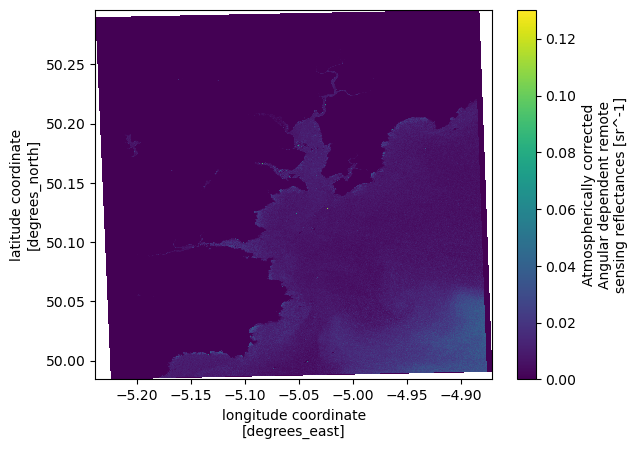

In [9]:
result_ds.rrs_B2.plot(x="lon", y="lat")

In [10]:
import numpy as np

In [11]:
rgb_img = np.dstack((result_ds.rrs_B4.data, result_ds.rrs_B3.data, result_ds.rrs_B2.data))

In [12]:
rgb_img.shape

(3401, 2536, 3)

In [13]:
import matplotlib.pyplot as plt

In [14]:
rgb_img.max()

0.1302131

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..6.472312].


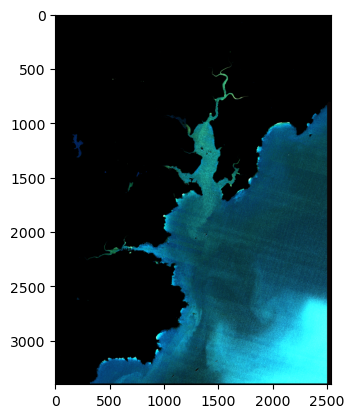

In [15]:
fig, ax = plt.subplots()
ax.imshow(rgb_img*(255.0/(rgb_img.max()+5)))

### Mask

The Valid_PE_mask is empty. Let's just create the mask with band maths.

In [62]:
with open("c2rcc_mask.xml", "r") as fp:
    mask_graph_file = fp.read()

In [64]:
mask_modified_xml = mask_graph_file.replace("$polygon", poly0['geoRegion'])

In [65]:
mask_graph = Graph.from_text(mask_modified_xml)

In [82]:
mask_process = SnapProcess(snap_graph=mask_graph, eo_config=config, eo_input=inputs)

In [83]:
mask_process.prepare_inputs()

{'inputs': {'snap_graph': 'PGdyYXBoIGlkPSJHcmFwaCI+CiAgPHZlcnNpb24+MS4wPC92ZXJzaW9uPgogIDxub2RlIGlkPSJSZWFkIj4KICAgIDxvcGVyYXRvcj5SZWFkPC9vcGVyYXRvcj4KICAgIDxzb3VyY2VzLz4KICAgIDxwYXJhbWV0ZXJzIGNsYXNzPSJjb20uYmMuY2VyZXMuYmluZGluZy5kb20uWHBwRG9tRWxlbWVudCI+CiAgICAgIDx1c2VBZHZhbmNlZE9wdGlvbnM+ZmFsc2U8L3VzZUFkdmFuY2VkT3B0aW9ucz4KICAgICAgPGZpbGU+JGltZzE8L2ZpbGU+CiAgICAgIDxjb3B5TWV0YWRhdGE+dHJ1ZTwvY29weU1ldGFkYXRhPgogICAgICA8YmFuZE5hbWVzLz4KICAgICAgPHBpeGVsUmVnaW9uPjAsMCwxMDk4MCwxMDk4MDwvcGl4ZWxSZWdpb24+CiAgICAgIDxtYXNrTmFtZXMvPgogICAgPC9wYXJhbWV0ZXJzPgogIDwvbm9kZT4KICA8bm9kZSBpZD0iU3Vic2V0Ij4KICAgIDxvcGVyYXRvcj5TdWJzZXQ8L29wZXJhdG9yPgogICAgPHNvdXJjZXM+CiAgICAgIDxzb3VyY2VQcm9kdWN0IHJlZmlkPSJSZWFkIi8+CiAgICA8L3NvdXJjZXM+CiAgICA8cGFyYW1ldGVycyBjbGFzcz0iY29tLmJjLmNlcmVzLmJpbmRpbmcuZG9tLlhwcERvbUVsZW1lbnQiPgogICAgICA8c291cmNlQmFuZHMvPgogICAgICA8dGllUG9pbnRHcmlkcy8+CiAgICAgIDxyZWdpb24+MCwwLDAsMDwvcmVnaW9uPgogICAgICA8cmVmZXJlbmNlQmFuZC8+CiAgICAgIDxnZW9SZWdpb24+UE9MWUdPTiAoKC01LjIyNDQ0MjU3IDQ5Ljk5M

In [84]:
mask_process.run(download_dir="mask")

Job: 6693febc-097a-568c-8e22-db65084578d0 - Status: accepted at 2025-01-27T18:08:09.862516
Job: 6693febc-097a-568c-8e22-db65084578d0 - Status: running at 2025-01-27T18:08:19.991309
Job: 6693febc-097a-568c-8e22-db65084578d0 - Status: running at 2025-01-27T18:08:31.059526
Job: 6693febc-097a-568c-8e22-db65084578d0 - Status: running at 2025-01-27T18:08:43.250113
Job: 6693febc-097a-568c-8e22-db65084578d0 - Status: running at 2025-01-27T18:08:56.629431
Job: 6693febc-097a-568c-8e22-db65084578d0 - Status: running at 2025-01-27T18:09:11.345402
Job: 6693febc-097a-568c-8e22-db65084578d0 - Status: running at 2025-01-27T18:09:27.514512
Job: 6693febc-097a-568c-8e22-db65084578d0 - Status: running at 2025-01-27T18:09:45.361548
Job: 6693febc-097a-568c-8e22-db65084578d0 - Status: running at 2025-01-27T18:10:04.921158
Job: 6693febc-097a-568c-8e22-db65084578d0 - Status: running at 2025-01-27T18:10:26.470738


In [16]:
mask_result_fp = 'mask//da07d51e-dcd9-11ef-8878-6fddd9a20336.nc'
mask_ds = xr.open_dataset(mask_result_fp)

In [17]:
mask_ds

<xarray.Dataset> Size: 172MB
Dimensions:    (y: 3401, x: 2536, tp_y: 5, tp_x: 5)
Coordinates:
    lat        (y, x) float64 69MB ...
    lon        (y, x) float64 69MB ...
Dimensions without coordinates: y, x, tp_y, tp_x
Data variables:
    metadata   int8 1B ...
    C2RCCMask  (y, x) float32 34MB ...
    tco3       (tp_y, tp_x) float32 100B ...
    tcwv       (tp_y, tp_x) float32 100B ...
    msl        (tp_y, tp_x) float32 100B ...
    r          (tp_y, tp_x) float32 100B ...
    _0u        (tp_y, tp_x) float32 100B ...
    _0v        (tp_y, tp_x) float32 100B ...
    crs        int32 4B ...
Attributes:
    Conventions:       CF-1.4
    TileSize:          512:512
    product_type:      BandMath
    metadata_profile:  beam
    metadata_version:  0.5
    start_date:        23-JUN-2020 11:21:19.024000
    stop_date:         23-JUN-2020 11:21:19.024000

In [18]:
c2rcc_mask = mask_ds.C2RCCMask.data

In [19]:
c2rcc_mask.shape

(3401, 2536)

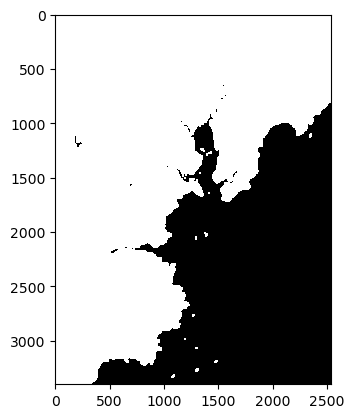

In [27]:
fig, ax = plt.subplots()
ax.imshow(c2rcc_mask, vmin=0, vmax=1, cmap='Greys')

In [28]:
# def mask_band(x):
#     return np.ma.masked_array(x, mask=c2rcc_mask)

In [29]:
# img_bands = [result_ds.rrs_B4.data, result_ds.rrs_B3.data, result_ds.rrs_B2.data]
# masked_bands = [mask_band(b) for b in img_bands]
# masked_img = np.dstack(masked_bands)

In [36]:
masked_img = np.multiply(rgb_img, np.expand_dims(c2rcc_mask, axis=-1))

In [49]:
masked_img = np.ma.masked_invalid(masked_img)

In [50]:
masked_img.max()

0.1302131

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0052340985..6.472312].


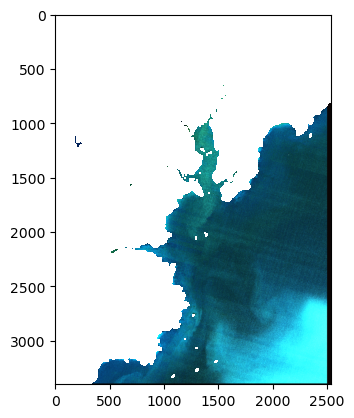

In [52]:
fig, ax = plt.subplots()
ax.imshow(masked_img*(255.0/(masked_img.max()+5)))